In [7]:
import os, sys
import pickle
import polars as pl

In [8]:
# Define el ID del experimento que quieres analizar
DATA_ID = 'simulation_testing' 
N_REALIZATIONS = 100

project_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..')) # Subir un nivel
results_dir = os.path.join(project_path, 'results', 'experiment_3', DATA_ID)
filename = f'results_exp_3_{DATA_ID}.pkl'
results_path = os.path.join(results_dir, filename)

sys.path.append(project_path)

#from src.experiments_utils import plot_experiment_3_results
#from config.config_experiment_3 import N_REALIZATIONS

In [9]:
results

NameError: name 'results' is not defined

In [11]:
# -------------------------------------------------------------------------
# CARGAR RESULTADOS
# -------------------------------------------------------------------------
if not os.path.exists(results_path):
    print("❌ Error: El archivo no existe. Revisa el DATA_ID o la ruta.")
else:
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
    print(f"✅ Archivo cargado correctamente. Tipo de objeto: {type(results)}")
    print(f"📊 Número de realizaciones (seeds) capturadas: {len(results)}")

# -------------------------------------------------------------------------
# CONVERSIÓN A DATAFRAME  
# -------------------------------------------------------------------------
rows = []
for seed, metrics in results.items():   
    # Asumimos que todas las métricas tienen las mismas claves (frac_sample_sizes)
    n_splits_arr = metrics['ARI'].keys() 
    frac_sample_size_arr = metrics['ARI'][list(n_splits_arr)[0]].keys()
    
    for n_splits in n_splits_arr:
        for frac in frac_sample_size_arr:        
            row = {
                'random_state': seed,
                'n_splits': n_splits,
                'frac_sample_size': frac,
                'time': metrics['time'].get(n_splits).get(frac),
                'adj_accuracy': metrics['adj_accuracy'].get(n_splits).get(frac),
                'ARI': metrics['ARI'].get(n_splits).get(frac)
            }
            rows.append(row)

df = pl.DataFrame(rows)

✅ Archivo cargado correctamente. Tipo de objeto: <class 'dict'>
📊 Número de realizaciones (seeds) capturadas: 5


In [12]:
df

random_state,n_splits,frac_sample_size,time,adj_accuracy,ARI
i64,i64,f64,f64,f64,f64
428,5,0.1,2.376677,0.8768,0.704409
428,5,0.2,2.268323,0.8818,0.715299
428,5,0.3,2.42906,0.8794,0.710692
428,5,0.4,2.617259,0.8806,0.713202
428,10,0.1,3.955083,0.8536,0.652442
…,…,…,…,…,…
2183,20,0.4,6.799716,0.879,0.709235
2183,40,0.1,11.892926,0.7238,0.410916
2183,40,0.2,11.454753,0.83,0.600262


In [13]:
df.filter(pl.col('random_state') == 428)

random_state,n_splits,frac_sample_size,time,adj_accuracy,ARI
i64,i64,f64,f64,f64,f64
428,5,0.1,2.376677,0.8768,0.704409
428,5,0.2,2.268323,0.8818,0.715299
428,5,0.3,2.42906,0.8794,0.710692
428,5,0.4,2.617259,0.8806,0.713202
428,10,0.1,3.955083,0.8536,0.652442
…,…,…,…,…,…
428,20,0.4,6.288555,0.88,0.710942
428,40,0.1,11.570403,0.7534,0.450699
428,40,0.2,11.718402,0.8314,0.60365


In [14]:
df_avg = (
    df.group_by(['n_splits', 'frac_sample_size'])
    .agg(pl.mean(['ARI', 'adj_accuracy', 'time']))
    .sort(['n_splits', 'frac_sample_size'])
)

df_avg

n_splits,frac_sample_size,ARI,adj_accuracy,time
i64,f64,f64,f64,f64
5,0.1,0.687921,0.8688,2.637373
5,0.2,0.687177,0.86928,2.440515
5,0.3,0.708422,0.8786,2.444887
5,0.4,0.696187,0.87204,2.473833
10,0.1,0.676639,0.86476,3.88973
…,…,…,…,…
20,0.4,0.70949,0.87928,6.430076
40,0.1,0.414311,0.72804,11.787549
40,0.2,0.597705,0.82808,11.551223


In [ ]:
def plot_experiment_3_results(df, data_name, num_realizations, save_path):
    """
    Genera gráficos usando solo Polars.
    El punto rojo en TODOS los gráficos corresponde a la configuración 
    que obtuvo la mejor 'adj_accuracy'.
    """

    # 1. Obtener la MEJOR combinación basada SOLO en Accuracy
    # Ordenamos descendente por accuracy y tomamos la primera fila
    best_row = df.sort("adj_accuracy", descending=True).row(0, named=True)

    # Extraemos los valores de esa fila ganadora
    best_frac_pct = best_row['frac_sample_size'] * 100
    
    # Estos son los valores Y del punto rojo para cada gráfica
    best_values = {
        'adj_accuracy': best_row['adj_accuracy'],
        'ARI': best_row['ARI'],
        'time': best_row['time']
    }

    # 2. Configuración de Ejes y Métricas
    fig, axes = plt.subplots(1, 3, figsize=(14, 5.5), sharex=True)
    
    metrics_config = [
        (0, 'adj_accuracy', 'Adj. Accuracy'),
        (1, 'ARI', 'ARI'),
        (2, 'time', 'Time (secs)')
    ]

    # 3. Obtener lista de folds únicos (usando sintaxis Polars)
    # unique() devuelve una Serie, sort() la ordena
    folds = df["n_splits"].unique().sort()

    # --- BUCLE DE PLOTEO ---
    for ax_idx, col_name, title_prefix in metrics_config:
        ax = axes[ax_idx]
        
        # A. Iterar sobre cada Fold para pintar las líneas azules
        for k in folds:
            # Filtrado estilo Polars
            subset = df.filter(pl.col("n_splits") == k)
            
            # Es importante ordenar por X para que la línea se dibuje bien
            subset = subset.sort("frac_sample_size")
            
            # Plotting: Polars requiere .to_list() para pasar los datos a matplotlib
            ax.plot(
                (subset['frac_sample_size'] * 100).to_list(), 
                subset[col_name].to_list(), 
                marker='o', markersize=5, 
                label=f"{k}-Fold"
            )

        # B. Pintar el PUNTO ROJO (Basado en la mejor Accuracy)
        # Usamos el valor correspondiente de 'best_values' para el eje Y actual
        ax.plot(
            [best_frac_pct],           # X: El porcentaje de la mejor fila
            [best_values[col_name]],   # Y: El valor de la métrica actual de la mejor fila
            marker='o', markersize=7, color='red', 
            zorder=10, label='Best Acc.' if ax_idx == 0 else ""
        )

        # C. Estética
        ax.set_title(f"{title_prefix} vs\nNumber of Folds and Sample Size", fontsize=11, fontweight='bold')
        ax.set_xlabel("Sample Size Parameter (%)", size=11)
        ax.set_ylabel(title_prefix, size=11)
        ax.grid(True, linestyle='--', alpha=0.5)

    # --- FINALIZACIÓN ---
    fig.suptitle(
        f"Results (Highlighted: Best Accuracy Configuration)\n{data_name.replace('_', ' ').capitalize()} - Realizations: {num_realizations}", 
        fontsize=13, fontweight='bold', y=0.98
    )

    # Leyenda (tomada del primer gráfico)
    handles, labels = axes[0].get_legend_handles_labels()
    # Filtramos duplicados en la leyenda por si acaso
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=len(folds)+1, fontsize=10, bbox_to_anchor=(0.5, 0.0))

    plt.tight_layout(rect=[0, 0.08, 1, 0.93])

    fig.savefig(save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)
    # plt.show() # Descomentar si quieres verlo interactivo

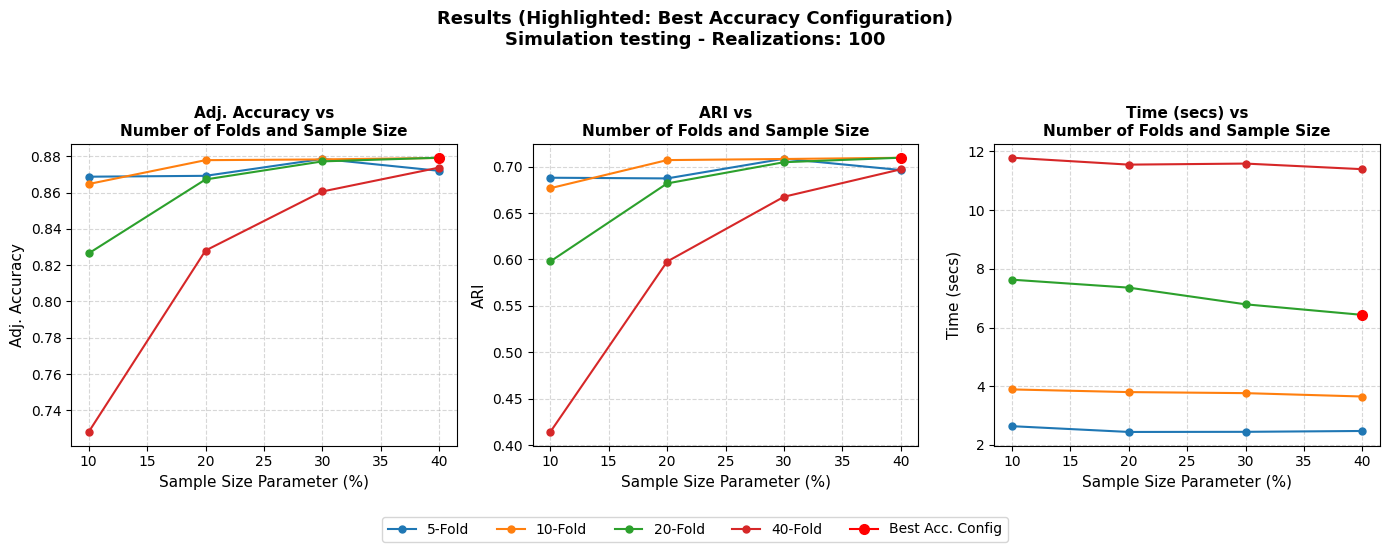

In [ ]:
import os

# Supongamos que df_avg es tu DataFrame con los resultados promedios
# Asegúrate de que df_avg tenga la columna 'n_splits'

# Definir ruta de guardado
plot_filename = f'plot_results_exp_multifold_{DATA_ID}.png'
save_path = os.path.join(results_dir, plot_filename)

# LLAMADA A LA FUNCIÓN
plot_experiment_3_results(
    df=df_avg,                 # Pasamos el DF entero
    data_name=DATA_ID,         # Nombre para el título
    num_realizations=100,      # O la variable que tenga este dato
    save_path=save_path
)